# Sensor de Temperaturas.

## Datos

Mediciones en 7 temperaturas diferentes:

-20 -10 0 10 20 30 40

10 Mediciones en cada temperatura:

5   8   11   14.5    18     22     27  Medias

Ruido: Normal, media 0, dt 1


In [117]:
from numpy.random import normal
#from numpy import random
#random.normal
# Generación de las mediciones:
                            # Parte no explicada: RUIDO
mediciones_20_bajo_cero=5 + normal(loc=0,scale=1, size=10)
                        # Parte explicada por la ciencia

In [118]:
mediciones_20_bajo_cero.mean()

4.940067297027045

In [119]:
# Variable que me hacen falta
temperaturas=range(-20,41,10)
medias=(5, 8, 11, 14.5, 18, 22, 27)


In [120]:
# METODO 1
mediciones=np.empty((7,10))
for indice in range(len(medias)):
    mediciones[indice,:]=medias[indice] + normal(loc=0,scale=1, size=10)


In [121]:
# METODO 2
ruido=normal(loc=0,scale=1, size=(7,10))
#matriz_medias=np.array(medias*10).reshape((10,7)).T
#matriz_medias=np.stack( (medias,  )*10 ).T
matriz_medias=np.stack( ( medias,  )*10 ,axis=1)
mediciones=matriz_medias + ruido
mediciones.shape

(7, 10)

In [122]:
# Quiero una regresion lineal
# De que datos debo partir?
# Puntos? Coordenada x, coordenada y
# Coordenada Temperatura, Coordenada Medicion
# La funcion en python para la regresion quiere 2 parametros: 
#    Array con las X (Tamaño: (70,) )
#    Array con las Y (Tamaño: (70,) )

In [123]:
#mediciones=mediciones.flatten()
mediciones=mediciones.reshape((70,))


In [124]:
temperaturas=range(-20,41,10)
temperaturas=np.array(list(temperaturas)*10).reshape(10,7).T.flatten()

In [125]:
mediciones

array([ 6.26909036,  5.28386072,  5.2746248 ,  6.5074682 ,  5.15732802,
        4.98639737,  5.48589426,  3.30291259,  5.75112345,  4.44661481,
        8.40635446,  7.84723893,  7.17712661,  8.33794699,  8.49816087,
        8.2516583 ,  8.79419288,  6.65528311,  8.39443563,  8.14912569,
       11.69296719, 11.65972237, 11.19044347, 10.96619432, 10.89650313,
       11.02469644, 11.30321191, 10.69351314, 11.2700606 , 10.9783624 ,
       14.67053575, 13.4810268 , 14.93840315, 14.06719448, 15.1064846 ,
       15.09515429, 14.41462913, 14.37386555, 13.81430822, 15.87905231,
       16.30691932, 17.42284802, 16.53401735, 18.08910982, 17.15090709,
       18.7794265 , 17.26431053, 17.34466989, 18.22599017, 20.12886705,
       20.72328543, 22.41285102, 21.58721425, 22.63365098, 19.31408716,
       20.857786  , 20.61649437, 21.6969617 , 21.14854868, 20.983496  ,
       26.79000061, 27.02899416, 27.8139565 , 27.21934295, 27.0201371 ,
       27.09051857, 26.49787124, 27.10462357, 26.83948779, 28.68

In [126]:
temperaturas

array([-20, -20, -20, -20, -20, -20, -20, -20, -20, -20, -10, -10, -10,
       -10, -10, -10, -10, -10, -10, -10,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,  10,  10,  10,  10,  10,  10,  10,  10,  10,
        10,  20,  20,  20,  20,  20,  20,  20,  20,  20,  20,  30,  30,
        30,  30,  30,  30,  30,  30,  30,  30,  40,  40,  40,  40,  40,
        40,  40,  40,  40,  40])

In [128]:
import statsmodels.api as sm
mediciones=sm.add_constant(mediciones)
modelo=sm.OLS(temperaturas,mediciones).fit()
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.974
Method:                 Least Squares   F-statistic:                     2637.
Date:                Wed, 18 Nov 2020   Prob (F-statistic):           3.98e-56
Time:                        10:33:06   Log-Likelihood:                -180.11
No. Observations:                  70   AIC:                             364.2
Df Residuals:                      68   BIC:                             368.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -31.5390      0.896    -35.214      0.000     -33.326     -29.752
x1             2.7645      0.054     51.354      0.000       2.657       2.872
==============================================================================
Omnibus:                        0.061   Durbin-Watson:                   1.114
Prob(Omnibus):                  0.970   Jarque-Bera (JB):                0.231
Skew:                           0.037   Prob(JB):                        0.891
Kurtosis:                       2.728   Cond. No.                         38.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [132]:
# Nuestro modelo que representa? Una regresion lineal: recta
# Ecuación de una recta: y=mx+n
# Ecuación de una recta: Temperatura = 2,69 x Medicion - 30.38
# m:
# n: 
modelo.predict((1,7))

array([-12.18744782])

In [135]:
mediciones[:,1].shape

(70,)

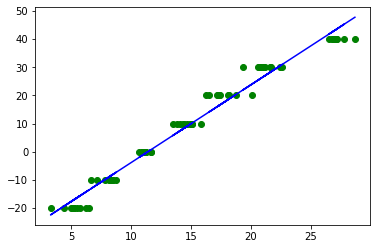

In [145]:
import matplotlib.pyplot as mp
mp.plot(mediciones[:,1],temperaturas,'o',color='green')
mp.plot(mediciones[:,1],modelo.predict(mediciones),color='blue')

In [159]:
# Regresion NO DE PRIMER ORDEN
import statsmodels.formula.api as smf
#mediciones=mediciones[:,1]
modelo=smf.ols(formula="T ~ np.power(M,2) + M + 1", data={"T":temperaturas,"M":mediciones}).fit()
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      T   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     2427.
Date:                Wed, 18 Nov 2020   Prob (F-statistic):           3.07e-63
Time:                        11:37:06   Log-Likelihood:                -158.64
No. Observations:                  70   AIC:                             323.3
Df Residuals:                      67   BIC:                             330.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        -40.5897      1.373    -29.563      0.000     -43.330     -37.849
np.power(M, 2)    -0.0440      0.006     -7.531      0.000      -0.056      -0.032
M                  4.1771      0.192     21.782      0.000       3.794       4.560
==============================================================================
Omnibus:                        6.252   Durbin-Watson:                   2.264
Prob(Omnibus):                  0.044   Jarque-Bera (JB):                5.951
Skew:                           0.487   Prob(JB):                       0.0510
Kurtosis:                       4.046   Cond. No.                     1.76e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.76e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [153]:
modelo.predict({"M":mediciones})

0    -16.016936
1    -18.916341
2    -18.942990
3    -15.299722
4    -19.280530
        ...    
65    39.717265
66    39.092985
67    39.730864
68    39.465376
69    40.867332
Length: 70, dtype: float64

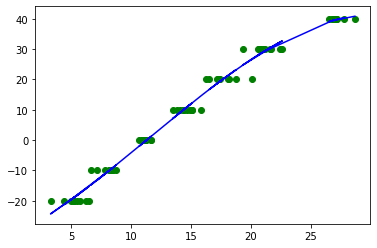

In [154]:
mp.plot(mediciones,temperaturas,'o',color='green')
mp.plot(mediciones,modelo.predict({"M":mediciones}),color='blue')